## Load Modules

In [1]:
using MLJ
using MultivariateStats
using Plots; gr()
using StatsPlots
using DataFrames
using PyCall

using CSV: read
using StatsBase: countmap, kurtosis
using Clustering: randindex, silhouettes, varinfo, vmeasure, mutualinfo
using LinearAlgebra: diag

In [2]:
ENV["LINES"] = 100;

In [3]:
RNG = 133;

## Import Data and Set Up

In [4]:
data = read("balance.csv")
data[!,2:end] = float.(data[:,2:end])

,Left_Weight,Left_Distance,Right_Weight,Right_Distance
,Float64,Float64,Float64,Float64
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,2.0
3,1.0,1.0,1.0,3.0
4,1.0,1.0,1.0,4.0
5,1.0,1.0,1.0,5.0
6,1.0,1.0,2.0,1.0
7,1.0,1.0,2.0,2.0
8,1.0,1.0,2.0,3.0
9,1.0,1.0,2.0,4.0


In [5]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Class_Name,,B,,R,3,,String
2,Left_Weight,3.0,1.0,3.0,5.0,,,Float64
3,Left_Distance,3.0,1.0,3.0,5.0,,,Float64
4,Right_Weight,3.0,1.0,3.0,5.0,,,Float64
5,Right_Distance,3.0,1.0,3.0,5.0,,,Float64


In [6]:
label_counts = countmap(data[:(Class_Name)])
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

3-element Array{Float64,1}:
 0.0784
 0.4608
 0.4608

In [7]:
coerce!(data, :Class_Name=>Multiclass)
schema(data)

┌────────────────┬─────────────────────────────────┬───────────────┐
│ _.names        │ _.types                         │ _.scitypes    │
├────────────────┼─────────────────────────────────┼───────────────┤
│ Class_Name     │ CategoricalValue{String,UInt32} │ Multiclass{3} │
│ Left_Weight    │ Float64                         │ Continuous    │
│ Left_Distance  │ Float64                         │ Continuous    │
│ Right_Weight   │ Float64                         │ Continuous    │
│ Right_Distance │ Float64                         │ Continuous    │
└────────────────┴─────────────────────────────────┴───────────────┘
_.nrows = 625


In [8]:
y, X = unpack(data, ==(:Class_Name), colname->true)
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=RNG, stratify=values(data[:Class_Name])) # gives 70:30 split

([342, 589, 478, 524, 282, 88, 9, 114, 564, 491  …  278, 274, 284, 467, 56, 407, 17, 109, 428, 401], [413, 566, 519, 240, 587, 61, 20, 312, 490, 334  …  356, 338, 361, 19, 567, 423, 176, 561, 371, 259])

#### Confirming that data was stratified correctly

In [9]:
train_counts = countmap(data[train,:Class_Name])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

3-element Array{Float64,1}:
 0.0781563126252505
 0.46092184368737477
 0.46092184368737477

In [10]:
test_counts = countmap(data[test,:Class_Name])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

3-element Array{Float64,1}:
 0.07936507936507936
 0.4603174603174603
 0.4603174603174603

#### Not standardizing

In [11]:
train_data = convert(Matrix,X[train,:])

499×4 Array{Float64,2}:
 3.0  4.0  4.0  2.0
 5.0  4.0  3.0  4.0
 4.0  5.0  1.0  3.0
 5.0  1.0  5.0  4.0
 3.0  2.0  2.0  2.0
 1.0  4.0  3.0  3.0
 1.0  1.0  2.0  4.0
 1.0  5.0  3.0  4.0
 5.0  3.0  3.0  4.0
 4.0  5.0  4.0  1.0
 3.0  1.0  5.0  5.0
 3.0  2.0  3.0  3.0
 5.0  3.0  1.0  4.0
 3.0  3.0  3.0  1.0
 5.0  2.0  2.0  1.0
 2.0  4.0  1.0  4.0
 5.0  1.0  2.0  5.0
 3.0  3.0  2.0  1.0
 3.0  4.0  2.0  1.0
 3.0  1.0  1.0  5.0
 3.0  2.0  4.0  2.0
 3.0  2.0  4.0  1.0
 4.0  2.0  4.0  1.0
 2.0  2.0  4.0  5.0
 5.0  4.0  1.0  2.0
 2.0  1.0  3.0  4.0
 3.0  4.0  4.0  1.0
 5.0  5.0  2.0  5.0
 2.0  2.0  4.0  4.0
 1.0  2.0  2.0  2.0
 5.0  1.0  2.0  3.0
 2.0  1.0  1.0  2.0
 3.0  5.0  5.0  2.0
 2.0  3.0  3.0  5.0
 5.0  5.0  4.0  2.0
 4.0  3.0  5.0  5.0
 2.0  5.0  4.0  1.0
 5.0  4.0  2.0  5.0
 1.0  2.0  4.0  5.0
 5.0  2.0  5.0  3.0
 5.0  2.0  2.0  5.0
 2.0  5.0  3.0  2.0
 4.0  2.0  5.0  2.0
 4.0  5.0  4.0  2.0
 1.0  4.0  5.0  3.0
 5.0  5.0  1.0  1.0
 3.0  2.0  2.0  5.0
 5.0  4.0  3.0  3.0
 ⋮              

## Set up model

In [12]:
task(model) = !model.is_supervised
models(task)

32-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AffinityPropagation, package_name = ScikitLearn, ... )
 (name = AgglomerativeClustering, package_name = ScikitLearn, ... )
 (name = Birch, package_name = ScikitLearn, ... )
 (name = ContinuousEncoder, package_name = MLJModels, ... )
 (name = DBSCAN, package_name = ScikitLearn, ... )
 (name = FactorAnalysis, package_name = MultivariateStats, ... )
 (name = FeatureAgglomeration, package_name = ScikitLearn, ... )
 (name = FeatureSelector, package_name = MLJModels, ... )
 (name = FillImputer, package_name = MLJModels, ... )
 (name = ICA, package_name = MultivariateStats, ... )
 (name = KMeans, package_name 

# Clustering Algorithms
Run the clustering algorithms on the datasets and describe what you see.

### KMeans
* https://github.com/PyDataBlog/ParallelKMeans.jl/blob/master/src/hamerly.jl#L65
* https://juliastats.org/Clustering.jl/stable/validate.html

In [13]:
@load KMeans pkg=ParallelKMeans
# @load KMeans pkg=Clustering

KMeans(
    algo = ParallelKMeans.Hamerly(),
    k_init = "k-means++",
    k = 3,
    tol = 1.0e-6,
    max_iters = 300,
    copy = true,
    threads = 4,
    rng = Random._GLOBAL_RNG(),
    weights = nothing,
    init = nothing) @552

In [14]:
# https://stackoverflow.com/questions/51181392/julia-vs-matlab-distance-matrix-run-time-test
function dist_mat(X::Matrix)
    G = X * X'
    dG = diag(G)
    return sqrt.(dG .+ dG' .- 2 .* G)
end

dist_mat (generic function with 1 method)

In [15]:
upper = 10
k_range = 2:upper
total_costs = []
sils = []
ls = []
sil_means = []
km_assignments = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, X)
    MLJ.fit!(mach, rows=train)
    
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    d = countmap(mach.report.assignments)
    
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    # https://juliastats.org/Clustering.jl/stable/validate.html
    s = silhouettes(mach.report.assignments, dist_mat(train_data))
    println("silhouette: $(mean(s))")
    
    push!(km_assignments, mach.report.assignments)
    push!(ls, l)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, s)
    push!(sil_means, mean(s))
    println("")
end

K = 2


┌ Info: Training Machine{KMeans} @542.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


Iteration 1: Jclust = 4421.0
Iteration 2: Jclust = 3903.390410059722
Iteration 3: Jclust = 3933.408872707408
Iteration 4: Jclust = 3879.817794847365
Iteration 5: Jclust = 3824.6344015031214
Iteration 6: Jclust = 3822.316220650946
Iteration 7: Jclust = 3831.1352320367705
Iteration 8: Jclust = 3776.363611876285
Iteration 9: Jclust = 3783.784893877938
Iteration 10: Jclust = 3776.3021069779024
Iteration 11: Jclust = 3784.219707554757
Iteration 12: Jclust = 3789.6485774607067
Iteration 13: Jclust = 3740.4992408245976
Iteration 14: Jclust = 3753.958293780855
Iteration 15: Jclust = 3741.8581899346145
Iteration 16: Jclust = 3747.4966968166145
Iteration 17: Jclust = 3740.6438480627726
Iteration 18: Jclust = 3749.971605031644
Iteration 19: Jclust = 3715.1397171705926
Iteration 20: Jclust = 3673.8189799613765
Iteration 21: Jclust = 3683.1486548354146
Iteration 22: Jclust = 3648.486077488995
Iteration 23: Jclust = 3571.7907885821883
Iteration 24: Jclust = 3550.48717945605
Iteration 25: Jclust = 35

┌ Info: Training Machine{KMeans} @233.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @850.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @759.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @243.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @004.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @212.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319
┌ Info: Training Machine{KMeans} @365.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


Iteration 1: Jclust = 2383.0
Iteration 2: Jclust = 1781.959955219797
Iteration 3: Jclust = 1639.538583405228
Iteration 4: Jclust = 1613.8338123934711
Iteration 5: Jclust = 1654.1315006283587
Iteration 6: Jclust = 1660.5167139737136
Iteration 7: Jclust = 1666.2544683221859
Iteration 8: Jclust = 1664.3283959856515
Iteration 9: Jclust = 1650.6549776263605
Iteration 10: Jclust = 1650.0557648451022
Iteration 11: Jclust = 1649.207365946503
Iteration 12: Jclust = 1630.321314601865
Iteration 13: Jclust = 1627.6542245842804
Iteration 14: Jclust = 1627.6542245842804
Successfully terminated with convergence.
mach.report.totalcost = 1503.1477950212077
l = [(1, 68), (2, 61), (3, 49), (4, 52), (5, 39), (6, 59), (7, 62), (8, 47), (9, 62)]
silhouette: 0.19561172083997486

K = 10
Iteration 1: Jclust = 2188.0
Iteration 2: Jclust = 1645.6366824972042
Iteration 3: Jclust = 1544.0607464576308
Iteration 4: Jclust = 1486.3943199798562
Iteration 5: Jclust = 1513.987166348829
Iteration 6: Jclust = 1531.2190198

┌ Info: Training Machine{KMeans} @213.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/Ov46j/src/machines.jl:319


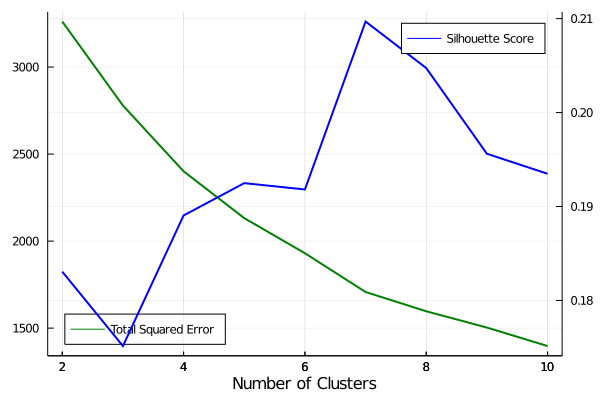

In [16]:
plot(k_range, total_costs, legend=:bottomleft, label="Total Squared Error", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(), k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [17]:
savefig("figures/bal_kmeans_metrics_$upper")

In [18]:
function prepare_portfolio(ls)
    N = size(ls)[1]
    D = size(ls[end])[1]
    mat = zeros(N, D)
    for i in 1:N
#         print("\n")
#         @show i
        for j in 1:size(ls[i])[1]
#             @show j
            mat[i,j] = ls[i][j][2]
        end
    end
    return mat
end

prepare_portfolio (generic function with 1 method)

In [19]:
function cum_columns(mat; normalize=false)
    mat2 = deepcopy(mat)
    normalize && (mat2 ./= sum(mat2, dims = 2)) # if you want to normalize each row
    for i in 2:size(mat2)[2]
       mat2[:,i] = mat2[:,i-1] + mat2[:,i]
    end
    return mat2'
end

cum_columns (generic function with 1 method)

In [20]:
function cum_plot(mat)
    N = size(mat)[2]
    p = plot(legend=:outertopright, palette=palette(:Accent_8))
    for i in N+1:-1:1
        plot!(1:N, mat[i,:], label="Cluster $(i)", fill=0, α=1)
    end
    xticks!(collect(1:N),string.(collect(2:N+1)))
    ylabel!("Cluster Proportion")
    xlabel!("Number of Clusters")
    display(p)
end

cum_plot (generic function with 1 method)

In [21]:
# plotattr(:Series)
plotattr("fillrange")

fillrange {Number or AbstractVector}
fill_between, fillbetween, fillranges, fillrng, fillto, frange

Fills area between fillrange and y for line-types, sets the base for bar/stick types, and similar for other types.
Series attribute,  default: nothing


In [22]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)

10×9 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.517034  0.378758  0.238477  0.218437  …  0.132265  0.136273  0.114228
 1.0       0.691383  0.509018  0.426854     0.260521  0.258517  0.222445
 1.0       1.0       0.735471  0.611222     0.382766  0.356713  0.326653
 1.0       1.0       1.0       0.831663     0.509018  0.460922  0.420842
 1.0       1.0       1.0       1.0          0.617234  0.539078  0.527054
 1.0       1.0       1.0       1.0       …  0.739479  0.657315  0.625251
 1.0       1.0       1.0       1.0          0.869739  0.781563  0.705411
 1.0       1.0       1.0       1.0          1.0       0.875752  0.785571
 1.0       1.0       1.0       1.0          1.0       1.0       0.903808
 1.0       1.0       1.0       1.0          1.0       1.0       1.0

#### Explanation
For the plot, the area below each line indicates the proportion of the instances that are contained in that cluster. X-axis is number of clusters in that Kmeans run. So for 2 means, there are 2 clusters. For 5 means, there is a large cluster 1, a large cluster 4, and a large cluster 5. Up to runs as large as 6 clusters, there are really only 3 prevalent clusters. Farther than that, it becomes more fragmented. 3 clusters

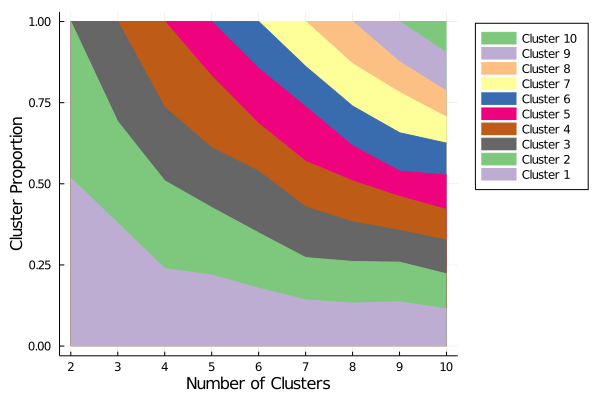

In [23]:
cum_plot(plotmat)

In [24]:
savefig("figures/bal_kmeans_portfolio_$upper")

#### Number of Clusters

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

using methods above, determined that 7 clusters

In [25]:
km_assignments[6] # is 7 clusters

499-element Array{Int64,1}:
 3
 5
 2
 5
 1
 3
 7
 3
 5
 4
 6
 6
 2
 4
 4
 7
 5
 1
 2
 7
 4
 4
 4
 6
 2
 6
 4
 2
 6
 1
 5
 1
 3
 7
 4
 5
 3
 5
 6
 4
 5
 3
 4
 4
 3
 2
 7
 2
 ⋮
 4
 5
 7
 7
 1
 5
 6
 5
 1
 3
 6
 6
 3
 4
 2
 5
 3
 5
 1
 4
 2
 2
 3
 5
 1
 1
 5
 6
 6
 3
 1
 1
 2
 1
 1
 2
 2
 1
 6
 7
 4
 1
 1
 6
 7
 2
 1

#### Verifying Clusters

In [26]:
y_1h = map(x-> if (x == "L") 1 elseif (x == "R") 2 else 3 end , y[train])
collect(zip(km_assignments[6], y_1h))

499-element Array{Tuple{Int64,Int64},1}:
 (3, 1)
 (5, 1)
 (2, 1)
 (5, 2)
 (1, 1)
 (3, 2)
 (7, 2)
 (3, 2)
 (5, 1)
 (4, 1)
 (6, 2)
 (6, 2)
 (2, 1)
 (4, 1)
 (4, 1)
 (7, 1)
 (5, 2)
 (1, 1)
 (2, 1)
 (7, 2)
 (4, 2)
 (4, 1)
 (4, 1)
 (6, 2)
 (2, 1)
 (6, 2)
 (4, 1)
 (2, 1)
 (6, 2)
 (1, 2)
 (5, 2)
 (1, 3)
 (3, 1)
 (7, 2)
 (4, 1)
 (5, 2)
 (3, 1)
 (5, 1)
 (6, 2)
 (4, 2)
 (5, 3)
 (3, 1)
 (4, 2)
 (4, 1)
 (3, 2)
 (2, 1)
 (7, 2)
 (2, 1)
 ⋮
 (4, 1)
 (5, 2)
 (7, 1)
 (7, 2)
 (1, 3)
 (5, 2)
 (6, 2)
 (5, 3)
 (1, 2)
 (3, 2)
 (6, 2)
 (6, 2)
 (3, 2)
 (4, 1)
 (2, 1)
 (5, 2)
 (3, 2)
 (5, 2)
 (1, 1)
 (4, 1)
 (2, 1)
 (2, 1)
 (3, 1)
 (5, 1)
 (1, 2)
 (1, 2)
 (5, 2)
 (6, 2)
 (6, 2)
 (3, 2)
 (1, 1)
 (1, 1)
 (2, 1)
 (1, 2)
 (1, 2)
 (2, 1)
 (2, 1)
 (1, 1)
 (6, 2)
 (7, 2)
 (4, 1)
 (1, 1)
 (1, 1)
 (6, 2)
 (7, 2)
 (2, 1)
 (1, 1)

In [27]:
mutualinfo(km_assignments[6], y_1h)

0.17217083630640004

In [28]:
vmeasure(km_assignments[6], y_1h)

0.17217083630639998

In [29]:
randindex(km_assignments[6], y_1h)

(0.09238207444103792, 0.5917054993521179, 0.4082945006478821, 0.18341099870423577)

In [30]:
varinfo(km_assignments[6], y_1h)

2.3629758146848374

In [ ]:
# cgrad(:bluesreds)
scatter(X[:,1].*X[:,2], X[:,3].*X[:,4], label=y_1h, color=:bluesreds)

In [ ]:
savefig("figures/bal_pair_plot")

1 and 27, 27 and 13. central mass of majority class, in different axes there are differences for the minority class. this meshes with the metrics that use the labels

### Expectation Maximization

* https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
* https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py
* https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* https://github.com/JuliaPy/PyCall.jl

In [ ]:
sklearn_m = pyimport("sklearn.mixture")

In [ ]:
upper = 8
k_range = 2:upper
bics = []
sils = []
ls = []
sil_means = []
em_assignments = []

for i in k_range
    println("Gaussians = $i")
    clf = sklearn_m.GaussianMixture(n_components=i, covariance_type="full", random_state=RNG)
    labels = clf.fit_predict(train_data) .+ 1; # indexing issues from python to julia functions
    
    d = countmap(labels)
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    s = silhouettes(labels, dist_mat(train_data))
    println("silhouette: $(mean(s))")
    
    bayes_ic = clf.bic(train_data)
    @show bayes_ic
    
    push!(ls, l)
    push!(sils, s)
    push!(sil_means, mean(s))
    push!(bics, bayes_ic)
    push!(em_assignments, labels)
    println("")
end

In [ ]:
plot(k_range, bics, legend=:bottomleft, label="Bayesian Info Criteria", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(),k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_em_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_em_portfolio_$upper")

#### Number of Clusters

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

using methods above, determined that 6 clusters

#### Verifying Clusters

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(em_assignments[5], y_1h))

In [ ]:
mutualinfo(em_assignments[5], y_1h)

In [ ]:
vmeasure(em_assignments[5], y_1h)

In [ ]:
randindex(em_assignments[5], y_1h)

In [ ]:
varinfo(em_assignments[5], y_1h)

In [ ]:
em_assignments[5]

# Dimensionality Reduction
Apply the dimensionality reduction algorithms to the two datasets and describe what you see.


### PCA

In [ ]:
info("PCA")

In [ ]:
model = @load PCA pkg="MultivariateStats" 
mach = machine(model, X)
MLJ.fit!(mach, rows=train)

In [ ]:
report(mach)

In [ ]:
report(mach)[:principalvars]

In [ ]:
fitted_params(mach)[1]

In [ ]:
d = MLJ.transform(mach, rows=train)

In [ ]:
scitype(d)

In [ ]:
report(mach)[:mean]

In [ ]:
# plot explained variance
max_dims=31
ex_vars = []
err_vars = []

for i in 1:max_dims
    model.maxoutdim = i
    mach = machine(model, X)
    MLJ.fit!(mach, rows=train) 
    d = MLJ.transform(mach, rows=train)
    
    r = mach.report
    push!(ex_vars, r[:tprincipalvar] / r[:tvar])   
    
    sqerr = (train_data - (Array(d) * fitted_params(mach)[1]' .+ r[:mean]')).^2 |> sum
    push!(err_vars, sqerr) 
    
end


In [ ]:
#elbow method
plot(1:max_dims, ex_vars, label="Explained Variance", legend=false)
ylims!(0,1)
yticks!(0:0.1:1)
xticks!(2:2:30)
xlabel!("Principal Components")
ylabel!("Explained Variance vs. No. Components")

In [ ]:
savefig("figures/bal_pca_explained_variance")

weak elbow, that has low explained variance. probably going to opt for around 20 after which it doesn't improve quickly

In [ ]:
plot(1:max_dims, err_vars, legend=false)
xlabel!("Principal Dimensions")
ylabel!("Squared Projection Loss")
xticks!(1:max_dims)
xticks!(2:2:30)

In [ ]:
savefig("figures/bal_pca_sqerr")

visualize top 2 or 3 principal components

In [ ]:
sum(mach.report[:principalvars][1:3]) / sum(mach.report[:principalvars])

In [ ]:
model.maxoutdim = 3
mach = machine(model, X)
MLJ.fit!(mach, rows=train) 
data_trans = MLJ.transform(mach, rows=train)

In [ ]:
plotattr(:Series)
plotattr("markercolor")
plotattr("seriescolor")
plotattr("camera")

In [ ]:
scatter(data_trans[:,1],data_trans[:,2],data_trans[:,3], leg=false, c=y_1h, camera=(60,80))

In [ ]:
savefig("figures/bal_pca_$(model.maxoutdim)_comps_3D")

In [ ]:
scatter(data_trans[:,1],data_trans[:,2],data_trans[:,3], leg=false, c=y_1h, camera=(50,30))

In [ ]:
PCA_best_comps = 22;

In [ ]:
model.maxoutdim = PCA_best_comps
mach = machine(model, X)
MLJ.fit!(mach, rows=train) 
PCA_data = MLJ.transform(mach, rows=train)

### ICA

In [ ]:
info("ICA")

In [ ]:
model = @load ICA pkg="MultivariateStats" 
model.k = 2
model.do_whiten = true
model.maxiter= 200
mach = machine(model, X)
MLJ.fit!(mach, rows=train)

In [ ]:
report(mach)

In [ ]:
mach.fitresult.W, mach.fitresult.mean

In [ ]:
data_trans = MLJ.transform(mach, rows=train)

In [ ]:
kurtosis(convert(Array, data_trans))

In [ ]:
max_comps = 10
model.maxiter= 1000
kurts = []
best_kurt = -Inf
best_ica_mach = nothing
best_i = 0
err_vars = []

for i in 1:max_comps
    @show i
    model.k = i
    model.do_whiten = true
    mach = machine(model, X)
    MLJ.fit!(mach, rows=train)
    d = MLJ.transform(mach, rows=train)
    r = mach.report
    krtoes = kurtosis(convert(Array, d))
    push!(kurts, krtoes)
    
    sqerr = (train_data - (Array(d) * mach.fitresult.W' .+ mach.fitresult.mean')).^2 |> sum
    push!(err_vars, sqerr) 
    
    if krtoes > best_kurt
        best_ica_mach = mach
        best_i = i
        best_kurt = krtoes
    end    
end

In [ ]:
kurts

In [ ]:
best_i, best_kurt

In [ ]:
best_ica_mach

In [ ]:
plot(kurts, legend=false, xlabel="Components", ylabel="Kurtosis", title="ICA Total Kurtosis vs. No. of Components")

In [ ]:
savefig("figures/bal_ica_kurtosis")

In [ ]:
plot(1:max_comps, err_vars, legend=false)
xlabel!("Independent Dimensions")
ylabel!("Squared Projection Loss")
xticks!(1:max_dims)
# ylims!(0.5, 1)

In [ ]:
savefig("figures/bal_ica_sqerr")

In [ ]:
ica_trans = MLJ.transform(best_ica_mach, rows=train)

In [ ]:
best_component = 0
best_k_so_far = 0
second_best = 0
for i in 1:size(ica_trans)[2]
    curr_k = kurtosis(ica_trans[:,i])
    @show i curr_k
    if curr_k > best_k_so_far
        second_best = best_component
        best_component = i
        best_k_so_far = curr_k
    end
    
end

In [ ]:
weight_mat = best_ica_mach.fitresult.W[:,best_component]

# https://stackoverflow.com/questions/3989016/how-to-find-all-positions-of-the-maximum-value-in-a-list
m = sort!(collect(zip((abs.(weight_mat)), 1:size(weight_mat)[1])), by=x->x[1], rev=true)

largest weighted features above deal with the number of carbon bonds and the number of halogen atoms in the molecule. these are actually largely independent, e.g. one is not a physical property that could be influenced by the other

In [ ]:
marginalscatter(ica_trans[:,best_component],ica_trans[:,second_best], leg=false, c=y_1h)

In [ ]:
savefig("figures/bal_ica_pair")

2 components have very high kurtosis

In [ ]:
pairplot(data_trans, y_1h, c=1:6)

In [ ]:
model = @load ICA pkg="MultivariateStats" 
model.k = best_i
model.do_whiten = true
model.maxiter= 1000
best_ica_mach = machine(model, X)
MLJ.fit!(best_ica_mach, rows=train)
ICA_data = MLJ.transform(best_ica_mach, rows=train)

### Randomized Projections
* https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.SparseRandomProjection.html#sklearn.random_projection.SparseRandomProjection

In [ ]:
sklearn_rp = pyimport("sklearn.random_projection") # may be necessary to run this

In [ ]:
RP = sklearn_rp.SparseRandomProjection(n_components=6, random_state=RNG)

In [ ]:
X_RP = RP.fit_transform(train_data)

In [ ]:
(train_data - convert(Array, X_RP * RP.components_)).^2 |> mean

In [ ]:
# plot reconstruction error
max_dims=25
err_vars_all = []

for z in rand(1:1000, 7)
    err_vars = []

    for i in 1:max_dims
        RP = sklearn_rp.SparseRandomProjection(n_components=i, random_state=z)
        X_RP = RP.fit_transform(train_data)
        sqerr = (train_data - convert(Array, X_RP * RP.components_)).^2 |> sum

        push!(err_vars, sqerr)   
    end
    push!(err_vars_all, err_vars)
end

# https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn

In [ ]:
plot(1:max_dims, err_vars_all, legend=false)
xlabel!("Random Dimensions")
ylabel!("Squared Projection Loss")
xticks!(1:2:max_dims)

In [ ]:
savefig("figures/bal_rp_sqerr")

In [ ]:
RP = sklearn_rp.SparseRandomProjection(n_components=23, random_state=RNG)

In [ ]:
RP_data = RP.fit_transform(train_data)

### Probabilistic PCA
* https://multivariatestatsjl.readthedocs.io/en/stable/kpca.html

In [ ]:
models("MultivariateStats")

In [ ]:
info("PPCA")

In [ ]:
model = @load PPCA pkg="MultivariateStats"
model.maxoutdim = 8
model.method = :ml

In [ ]:
mach = machine(model, X)
MLJ.fit!(mach, rows=train)

In [ ]:
report(mach)

In [ ]:
fitted_params(mach)

In [ ]:
fitted_params(mach)[1]

In [ ]:
d = MLJ.transform(mach, rows=train)

In [ ]:
(train_data - (Array(d) * fitted_params(mach)[1]' .+ report(mach)[:mean]')).^2 |> sum

In [ ]:
# plot reconstruction error
max_dims=15
err_vars = []

for i in 1:max_dims
    model.maxoutdim = i
    mach = machine(model, X)
    MLJ.fit!(mach, rows=train) 
    d = MLJ.transform(mach, rows=train)
    r = mach.report
    
    sqerr = (train_data - (Array(d) * fitted_params(mach)[1]' .+ r[:mean]')).^2 |> sum
    push!(err_vars, sqerr) 
    
end


In [ ]:
plot(1:max_dims, err_vars, legend=false)
xlabel!("Principal Dimensions")
ylabel!("Squared Projection Loss")
xticks!(2:2:max_dims)

In [ ]:
savefig("figures/bal_ppca_sqerr")

In [ ]:
PPCA_best_dim = 7
model.maxoutdim = PPCA_best_dim
model.method = :ml

In [ ]:
mach = machine(model, X)
MLJ.fit!(mach, rows=train)
PPCA_data = MLJ.transform(mach, rows=train)

# Clustering Pt 2
Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.

### PCA - Kmeans

In [ ]:
PCA_data = convert(Array, PCA_data)

In [ ]:
upper = 7
k_range = 2:upper
total_costs = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, PCA_data)
    MLJ.fit!(mach)
    
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    d = countmap(mach.report.assignments)
    
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    # https://juliastats.org/Clustering.jl/stable/validate.html
    s = silhouettes(mach.report.assignments, dist_mat(PCA_data))
    println("silhouette: $(mean(s))")
    
    push!(assignments, mach.report.assignments)
    push!(ls, l)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, s)
    push!(sil_means, mean(s))
    println("")
end

In [ ]:
plot(k_range, total_costs, legend=:bottomleft, label="Total Squared Error", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(), k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_pca_kmeans_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)

In [ ]:
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_pca_kmeans_portfolio_$upper")

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

In [ ]:
mutualinfo(assignments[2], y_1h)

In [ ]:
vmeasure(assignments[2], y_1h)

In [ ]:
randindex(assignments[2], y_1h)

In [ ]:
varinfo(assignments[2], y_1h)

### PCA - EM

In [ ]:
upper = 8
k_range = 2:upper
bics = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("Gaussians = $i")
    clf = sklearn_m.GaussianMixture(n_components=i, covariance_type="full", random_state=RNG)
    labels = clf.fit_predict(PCA_data) .+ 1; # indexing issues from python to julia functions
    
    d = countmap(labels)
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    s = silhouettes(labels, dist_mat(PCA_data))
    println("silhouette: $(mean(s))")
    
    bayes_ic = clf.bic(PCA_data)
    @show bayes_ic
    
    push!(ls, l)
    push!(sils, s)
    push!(sil_means, mean(s))
    push!(bics, bayes_ic)
    push!(assignments, labels)
    println("")
end

In [ ]:
plot(k_range, bics, legend=:bottomleft, label="Bayesian Info Criteria", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(),k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_pca_em_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_pca_em_portfolio_$upper")

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

In [ ]:
mutualinfo(assignments[2], y_1h)

In [ ]:
vmeasure(assignments[2], y_1h)

In [ ]:
randindex(assignments[2], y_1h)

In [ ]:
varinfo(assignments[2], y_1h)

### ICA - Kmeans

In [ ]:
ICA_data = convert(Array, ICA_data)

In [ ]:
upper = 8
k_range = 2:upper
total_costs = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, ICA_data)
    MLJ.fit!(mach)
    
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    d = countmap(mach.report.assignments)
    
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    # https://juliastats.org/Clustering.jl/stable/validate.html
    s = silhouettes(mach.report.assignments, dist_mat(ICA_data))
    println("silhouette: $(mean(s))")
    
    push!(assignments, mach.report.assignments)
    push!(ls, l)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, s)
    push!(sil_means, mean(s))
    println("")
end

In [ ]:
plot(k_range, total_costs, legend=:bottomleft, label="Total Squared Error", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(), k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_ica_kmeans_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)

In [ ]:
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_ica_kmeans_portfolio_$upper")

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

In [ ]:
mutualinfo(assignments[2], y_1h)

In [ ]:
vmeasure(assignments[2], y_1h)

In [ ]:
randindex(assignments[2], y_1h)

In [ ]:
varinfo(assignments[2], y_1h)

### ICA - EM 

In [ ]:
upper = 8
k_range = 2:upper
bics = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("Gaussians = $i")
    clf = sklearn_m.GaussianMixture(n_components=i, covariance_type="full", random_state=RNG)
    labels = clf.fit_predict(PCA_data) .+ 1; # indexing issues from python to julia functions
    
    d = countmap(labels)
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    s = silhouettes(labels, dist_mat(PCA_data))
    println("silhouette: $(mean(s))")
    
    bayes_ic = clf.bic(PCA_data)
    @show bayes_ic
    
    push!(ls, l)
    push!(sils, s)
    push!(sil_means, mean(s))
    push!(bics, bayes_ic)
    push!(assignments, labels)
    println("")
end

In [ ]:
plot(k_range, bics, legend=:bottomleft, label="Bayesian Info Criteria", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(),k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_ica_em_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_ica_em_portfolio_$upper")

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

In [ ]:
mutualinfo(assignments[2], y_1h)

In [ ]:
vmeasure(assignments[2], y_1h)

In [ ]:
randindex(assignments[2], y_1h)

In [ ]:
varinfo(assignments[2], y_1h)

### Randomized Projections - Kmeans

In [ ]:
upper = 8
k_range = 2:upper
total_costs = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, RP_data)
    MLJ.fit!(mach)
    
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    d = countmap(mach.report.assignments)
    
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    # https://juliastats.org/Clustering.jl/stable/validate.html
    s = silhouettes(mach.report.assignments, dist_mat(RP_data))
    println("silhouette: $(mean(s))")
    
    push!(assignments, mach.report.assignments)
    push!(ls, l)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, s)
    push!(sil_means, mean(s))
    println("")
end

In [ ]:
plot(k_range, total_costs, legend=:bottomleft, label="Total Squared Error", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(), k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_rp_kmeans_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)

In [ ]:
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_rp_kmeans_portfolio_$upper")

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

In [ ]:
mutualinfo(assignments[2], y_1h)

In [ ]:
vmeasure(assignments[2], y_1h)

In [ ]:
randindex(assignments[2], y_1h)

In [ ]:
varinfo(assignments[2], y_1h)

### Randomized Projections - EM

In [ ]:
upper = 8
k_range = 2:upper
bics = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("Gaussians = $i")
    clf = sklearn_m.GaussianMixture(n_components=i, covariance_type="full", random_state=RNG)
    labels = clf.fit_predict(RP_data) .+ 1; # indexing issues from python to julia functions
    
    d = countmap(labels)
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    s = silhouettes(labels, dist_mat(RP_data))
    println("silhouette: $(mean(s))")
    
    bayes_ic = clf.bic(RP_data)
    @show bayes_ic
    
    push!(ls, l)
    push!(sils, s)
    push!(sil_means, mean(s))
    push!(bics, bayes_ic)
    push!(assignments, labels)
    println("")
end

In [ ]:
plot(k_range, bics, legend=:bottomleft, label="Bayesian Info Criteria", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(),k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_rp_em_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_rp_em_portfolio_$upper")

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

In [ ]:
mutualinfo(assignments[2], y_1h)

In [ ]:
vmeasure(assignments[2], y_1h)

In [ ]:
randindex(assignments[2], y_1h)

In [ ]:
varinfo(assignments[2], y_1h)

### PPCA - Kmeans

In [ ]:
PPCA_data = Array(PPCA_data)

In [ ]:
upper = 8
k_range = 2:upper
total_costs = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, PPCA_data)
    MLJ.fit!(mach)
    
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    d = countmap(mach.report.assignments)
    
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    # https://juliastats.org/Clustering.jl/stable/validate.html
    s = silhouettes(mach.report.assignments, dist_mat(PPCA_data))
    println("silhouette: $(mean(s))")
    
    push!(assignments, mach.report.assignments)
    push!(ls, l)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, s)
    push!(sil_means, mean(s))
    println("")
end

values for loss are likely a lot smaller because there are fewer dimensions

In [ ]:
plot(k_range, total_costs, legend=:bottomleft, label="Total Squared Error", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(), k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_ppca_kmeans_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)

In [ ]:
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_ppca_kmeans_portfolio_$upper")

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

In [ ]:
mutualinfo(assignments[2], y_1h)

In [ ]:
vmeasure(assignments[2], y_1h)

In [ ]:
randindex(assignments[2], y_1h)

In [ ]:
varinfo(assignments[2], y_1h)

### PPCA - EM

In [ ]:
upper = 8
k_range = 2:upper
bics = []
sils = []
ls = []
sil_means = []
assignments = []

for i in k_range
    println("Gaussians = $i")
    clf = sklearn_m.GaussianMixture(n_components=i, covariance_type="full", random_state=RNG)
    labels = clf.fit_predict(PPCA_data) .+ 1; # indexing issues from python to julia functions
    
    d = countmap(labels)
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    s = silhouettes(labels, dist_mat(PPCA_data))
    println("silhouette: $(mean(s))")
    
    bayes_ic = clf.bic(PPCA_data)
    @show bayes_ic
    
    push!(ls, l)
    push!(sils, s)
    push!(sil_means, mean(s))
    push!(bics, bayes_ic)
    push!(assignments, labels)
    println("")
end

In [ ]:
plot(k_range, bics, legend=:bottomleft, label="Bayesian Info Criteria", color=:green, lw=2)
xlabel!("Number of Clusters")
plot!(twinx(),k_range, sil_means, legend=:topright, label="Silhouette Score", color=:blue, lw=2)

In [ ]:
savefig("figures/bal_ppca_em_metrics_$upper")

In [ ]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)
cum_plot(plotmat)

In [ ]:
savefig("figures/bal_ppca_em_portfolio_$upper")

In [ ]:
y_1h = map(x-> if (x == "RB") 1 else 2 end , y[train])
collect(zip(assignments[2], y_1h))

In [ ]:
mutualinfo(assignments[2], y_1h)

In [ ]:
vmeasure(assignments[2], y_1h)

In [ ]:
randindex(assignments[2], y_1h)

In [ ]:
varinfo(assignments[2], y_1h)

# BELOW ONLY FOR 1 DATASET

### Dimensionality Reduction + NN 
Apply the dimensionality reduction algorithms to one of your datasets from assignment #1. (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.

In [ ]:
using MLJFlux
using Flux

In [ ]:
acc(ŷ, y) = (mode.(ŷ) .== y) |> mean

In [ ]:
# Define a custom network
mutable struct CustomNN <:MLJFlux.Builder
    n1 ::Int
end

In [ ]:
function MLJFlux.build(nn::CustomNN, n_in, n_out)
    return Chain(
        Flux.Dense(n_in, nn.n1, σ),
        Flux.Dense(nn.n1, n_out, σ)
    )
end

In [ ]:
@load NeuralNetworkClassifier
# nn = NeuralNetworkClassifier(builder=CustomNN(132))

In [ ]:
batch_sz = 16;
max_epochs = 1000;

### PCA

In [ ]:
pca_pipe = @pipeline PCA2 NeuralNetworkClassifier(builder=CustomNN(132))

In [ ]:
pca_pipe.pca.maxoutdim = PCA_best_comps
pca_pipe.neural_network_classifier.batch_size = batch_sz;

In [ ]:
pca_pipe.neural_network_classifier.epochs = max_epochs
pca_pipe.neural_network_classifier.lambda = 0.01
pca_pipe.neural_network_classifier.optimiser.eta = 0.0015;

In [ ]:
pca_nn_mach = machine(pca_pipe, X, y)

In [ ]:
fit!(pca_nn_mach, verbosity=2)

In [ ]:
param1 = :(neural_network_classifier.epochs)
param2 = :(neural_network_classifier.optimiser.eta)

r1 = range(pca_pipe, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(pca_pipe, param2, lower=0.001, upper=0.01, scale=:log10)

In [ ]:
pca_nn_tuning = TunedModel(model=pca_pipe,
                                    tuning=Grid(goal=144, rng=RNG),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

In [ ]:
pca_nn_tuning_mach = machine(pca_nn_tuning, X, y)

In [ ]:
fit!(pca_nn_tuning_mach, rows=train)

In [ ]:
plot(pca_nn_tuning_mach)

In [ ]:
int1 = fitted_params(pca_nn_tuning_mach)[:best_model].neural_network_classifier

In [ ]:
pca_pipe

In [ ]:
pca_pipe.neural_network_classifier = int1

In [ ]:
param1 = :(neural_network_classifier.epochs)
param2 = :(neural_network_classifier.lambda)

r1 = range(pca_pipe, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(pca_pipe, param2, lower=0.001, upper=0.5, scale=:log10)

In [ ]:
pca_nn_tuning = TunedModel(model=pca_pipe,
                                    tuning=Grid(goal=144, rng=RNG),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

In [ ]:
pca_nn_tuning_mach = machine(pca_nn_tuning, X, y)

In [ ]:
z = fit!(pca_nn_tuning_mach, rows=train)

In [ ]:
plot(pca_nn_tuning_mach)

In [ ]:
int2 = fitted_params(pca_nn_tuning_mach)[:best_model].neural_network_classifier

In [ ]:
pca_pipe.neural_network_classifier = int2
pca_nn_mach = machine(pca_pipe, X, y)
pca_nn_acc = evaluate!(pca_nn_mach, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
# vals = collect(0:5:max_epochs)
r = range(pca_pipe, :(neural_network_classifier.epochs), lower=1, upper=max_epochs, scale=:log10)

In [ ]:
curve = MLJ.learning_curve(pca_nn_mach, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses()
)

In [ ]:
# plot(Net.report.training_losses, label="Training", lw=2)
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)

In [ ]:
a = round(pca_pipe.neural_network_classifier.optimiser.eta, digits=5)
b = round(minimum(curve.measurements), digits=5)
best_epochs = curve.parameter_values[argmin(curve.measurements)]
a,b, best_epochs

In [ ]:
pca_pipe.neural_network_classifier.epochs = best_epochs

In [ ]:
Final_Net = machine(pca_pipe, X, y)

In [ ]:
fit!(Final_Net, rows=train, force=true, verbosity=1)

In [ ]:
nn_acc = evaluate!(Final_Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
ŷ = MLJ.predict(Final_Net, X[test,:]);

In [ ]:
cross_entropy(ŷ, y[test]) |> mean

In [ ]:
acc(ŷ, y[test])

In [ ]:
c = confusion_matrix(mode.(ŷ), y[test])

In [ ]:
precision(c),recall(c)

### ICA

In [ ]:
ica_pipe = NeuralNetworkClassifier(builder=CustomNN(132))

In [ ]:
ica_pipe.batch_size = batch_sz
ica_pipe.epochs = max_epochs
ica_pipe.lambda = 0.01
ica_pipe.optimiser.eta = 0.0015;

In [ ]:
ica_nn_mach = machine(ica_pipe, ica_trans, y[train])

In [ ]:
fit!(ica_nn_mach, verbosity=2)

In [ ]:
param1 = :(epochs)
param2 = :(optimiser.eta)

r1 = range(ica_pipe, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(ica_pipe, param2, lower=10^-3, upper=10^-1.4, scale=:log10)

In [ ]:
ica_nn_tuning = TunedModel(model=ica_pipe,
                                    tuning=Grid(goal=289, rng=RNG),
                                    resampling=Holdout(fraction_train=0.7, rng=RNG), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

In [ ]:
ica_nn_tuning_mach = machine(ica_nn_tuning, ica_trans, y[train])

In [ ]:
fit!(ica_nn_tuning_mach)

In [ ]:
plot(ica_nn_tuning_mach)

In [ ]:
int1 = fitted_params(ica_nn_tuning_mach)[:best_model]

In [ ]:
ica_pipe = int1

In [ ]:
param1 = :(epochs)
param2 = :(lambda)

r1 = range(ica_pipe, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(ica_pipe, param2, lower=0.001, upper=0.3, scale=:log10)

In [ ]:
ica_nn_tuning = TunedModel(model=ica_pipe,
                                    tuning=Grid(goal=144, rng=RNG),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

In [ ]:
ica_nn_tuning_mach = machine(ica_nn_tuning, X, y)

In [ ]:
z = fit!(ica_nn_tuning_mach, rows=train)

In [ ]:
plot(ica_nn_tuning_mach)

In [ ]:
int2 = fitted_params(ica_nn_tuning_mach)[:best_model]

In [ ]:
ica_pipe = int2
ica_nn_mach = machine(ica_pipe, X, y)
ica_nn_acc = evaluate!(ica_nn_mach, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
# vals = collect(0:5:max_epochs)
r = range(ica_pipe, :(epochs), lower=1, upper=max_epochs, scale=:log10)

In [ ]:
curve = MLJ.learning_curve(ica_nn_mach, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses()
)

In [ ]:
# plot(Net.report.training_losses, label="Training", lw=2)
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)

In [ ]:
a = round(ica_pipe.optimiser.eta, digits=5)
b = round(minimum(curve.measurements), digits=5)
best_epochs = curve.parameter_values[argmin(curve.measurements)]
a,b, best_epochs

In [ ]:
ica_pipe.epochs = best_epochs

In [ ]:
Final_Net = machine(ica_pipe, ica_trans, y[train])

In [ ]:
fit!(Final_Net)

In [ ]:
nn_acc = evaluate!(Final_Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
ica_nn_test = MLJ.transform(best_ica_mach, rows=test)

In [ ]:
ŷ = MLJ.predict(Final_Net, ica_nn_test);

In [ ]:
cross_entropy(ŷ, y[test]) |> mean

In [ ]:
acc(ŷ, y[test])

In [ ]:
c = confusion_matrix(mode.(ŷ), y[test])

In [ ]:
precision(c),recall(c)

### RP

In [ ]:
RP_data = DataFrame(RP_data)

In [ ]:
rp_pipe = NeuralNetworkClassifier(builder=CustomNN(132))

In [ ]:
rp_pipe.batch_size = batch_sz
rp_pipe.epochs = max_epochs
rp_pipe.lambda = 0.01
rp_pipe.optimiser.eta = 0.0015;

In [ ]:
rp_nn_mach = machine(rp_pipe, RP_data, y[train])

In [ ]:
fit!(rp_nn_mach, verbosity=2)

In [ ]:
param1 = :(epochs)
param2 = :(optimiser.eta)

r1 = range(rp_pipe, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(rp_pipe, param2, lower=10^-3, upper=10^-1.4, scale=:log10)

In [ ]:
rp_nn_tuning = TunedModel(model=rp_pipe,
                                    tuning=Grid(goal=289, rng=RNG),
                                    resampling=Holdout(fraction_train=0.7, rng=RNG), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

In [ ]:
rp_nn_tuning_mach = machine(rp_nn_tuning, RP_data, y[train])

In [ ]:
fit!(rp_nn_tuning_mach)

In [ ]:
plot(rp_nn_tuning_mach)

In [ ]:
int1 = fitted_params(rp_nn_tuning_mach)[:best_model]

In [ ]:
rp_pipe = int1

In [ ]:
param1 = :(epochs)
param2 = :(lambda)

r1 = range(rp_pipe, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(rp_pipe, param2, lower=0.001, upper=0.3, scale=:log10)

In [ ]:
rp_nn_tuning = TunedModel(model=rp_pipe,
                                    tuning=Grid(goal=144, rng=RNG),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

In [ ]:
rp_nn_tuning_mach = machine(rp_nn_tuning, X, y)

In [ ]:
z = fit!(rp_nn_tuning_mach, rows=train)

In [ ]:
plot(rp_nn_tuning_mach)

In [ ]:
int2 = fitted_params(rp_nn_tuning_mach)[:best_model]

In [ ]:
rp_pipe = int2
rp_nn_mach = machine(rp_pipe, RP_data, y[train])
rp_nn_acc = evaluate!(rp_nn_mach, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
# vals = collect(0:5:max_epochs)
r = range(rp_pipe, :(epochs), lower=1, upper=max_epochs, scale=:log10)

In [ ]:
curve = MLJ.learning_curve(rp_nn_mach, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses()
)

In [ ]:
# plot(Net.report.training_losses, label="Training", lw=2)
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)

In [ ]:
a = round(rp_pipe.optimiser.eta, digits=5)
b = round(minimum(curve.measurements), digits=5)
best_epochs = curve.parameter_values[argmin(curve.measurements)]
a,b, best_epochs

In [ ]:
rp_pipe.epochs = best_epochs

In [ ]:
Final_Net = machine(rp_pipe, RP_data, y[train])

In [ ]:
fit!(Final_Net)

In [ ]:
nn_acc = evaluate!(Final_Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
test_data = convert(Matrix,X[test,:])
RP_test = RP.transform(test_data)

In [ ]:
ŷ = MLJ.predict(Final_Net, RP_test);

In [ ]:
cross_entropy(ŷ, y[test]) |> mean

In [ ]:
acc(ŷ, y[test])

In [ ]:
c = confusion_matrix(mode.(ŷ), y[test])

In [ ]:
precision(c),recall(c)

### PPCA

In [ ]:
@load PPCA

In [ ]:
ppca_pipe = @pipeline PPCA2 NeuralNetworkClassifier(builder=CustomNN(132))

In [ ]:
ppca_pipe.ppca.maxoutdim = PPCA_best_dim
ppca_pipe.neural_network_classifier.batch_size = batch_sz;

In [ ]:
ppca_pipe.neural_network_classifier.epochs = max_epochs
ppca_pipe.neural_network_classifier.lambda = 0.01
ppca_pipe.neural_network_classifier.optimiser.eta = 0.0015;

In [ ]:
ppca_nn_mach = machine(ppca_pipe, X, y)

In [ ]:
fit!(ppca_nn_mach, verbosity=2)

In [ ]:
param1 = :(neural_network_classifier.epochs)
param2 = :(neural_network_classifier.optimiser.eta)

r1 = range(ppca_pipe, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(ppca_pipe, param2, lower=10^-2.5, upper=0.01, scale=:log10)

In [ ]:
ppca_nn_tuning = TunedModel(model=ppca_pipe,
                                    tuning=Grid(goal=144, rng=RNG),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

In [ ]:
ppca_nn_tuning_mach = machine(ppca_nn_tuning, X, y)

In [ ]:
fit!(ppca_nn_tuning_mach, rows=train)

In [ ]:
plot(ppca_nn_tuning_mach)

In [ ]:
int1 = fitted_params(ppca_nn_tuning_mach)[:best_model].neural_network_classifier

In [ ]:
ppca_pipe.neural_network_classifier = int1

In [ ]:
param1 = :(neural_network_classifier.epochs)
param2 = :(neural_network_classifier.lambda)

r1 = range(ppca_pipe, param1, lower=10, upper=max_epochs, scale=:linear)
r2 = range(ppca_pipe, param2, lower=0.001, upper=0.5, scale=:log10)

In [ ]:
ppca_nn_tuning = TunedModel(model=ppca_pipe,
                                    tuning=Grid(goal=144, rng=RNG),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

In [ ]:
ppca_nn_tuning_mach = machine(ppca_nn_tuning, X, y)

In [ ]:
z = fit!(ppca_nn_tuning_mach, rows=train)

In [ ]:
plot(ppca_nn_tuning_mach)

In [ ]:
int2 = fitted_params(ppca_nn_tuning_mach)[:best_model].neural_network_classifier

In [ ]:
ppca_pipe.neural_network_classifier = int2
ppca_nn_mach = machine(ppca_pipe, X, y)
ppca_nn_acc = evaluate!(ppca_nn_mach, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
# vals = collect(0:5:max_epochs)
r = range(ppca_pipe, :(neural_network_classifier.epochs), lower=1, upper=max_epochs, scale=:log10)

In [ ]:
curve = MLJ.learning_curve(ppca_nn_mach, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses()
)

In [ ]:
# plot(Net.report.training_losses, label="Training", lw=2)
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)

In [ ]:
a = round(ppca_pipe.neural_network_classifier.optimiser.eta, digits=5)
b = round(minimum(curve.measurements), digits=5)
best_epochs = curve.parameter_values[argmin(curve.measurements)]
a,b, best_epochs

In [ ]:
ppca_pipe.neural_network_classifier.epochs = best_epochs

In [ ]:
Final_Net = machine(ppca_pipe, X, y)

In [ ]:
fit!(Final_Net, rows=train, force=true, verbosity=1)

In [ ]:
nn_acc = evaluate!(Final_Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

In [ ]:
ŷ = MLJ.predict(Final_Net, X[test,:]);

In [ ]:
cross_entropy(ŷ, y[test]) |> mean

In [ ]:
acc(ŷ, y[test])

In [ ]:
c = confusion_matrix(mode.(ŷ), y[test])

In [ ]:
precision(c),recall(c)